In [41]:
import numpy as np
import pandas as pd

In [42]:
reldir = 'C:\\Users\\shefa\\OneDrive\\CS6220\\msd.recsys\\datasets\\'

In [43]:
df = pd.read_pickle(reldir + 'msd_tastes_merged.csv', compression='zip')

In [44]:
df_msd = pd.read_pickle(reldir + 'msd.csv', compression='zip')

In [45]:
df.head()

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_analysis_sample_rate,analysis_songs_audio_md5,analysis_songs_danceability,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_energy,analysis_songs_idx_bars_confidence,analysis_songs_idx_bars_start,analysis_songs_idx_beats_confidence,analysis_songs_idx_beats_start,analysis_songs_idx_sections_confidence,analysis_songs_idx_sections_start,analysis_songs_idx_segments_confidence,analysis_songs_idx_segments_loudness_max,analysis_songs_idx_segments_loudness_max_time,analysis_songs_idx_segments_loudness_start,analysis_songs_idx_segments_pitches,analysis_songs_idx_segments_start,analysis_songs_idx_segments_timbre,analysis_songs_idx_tatums_confidence,analysis_songs_idx_tatums_start,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_latitude,metadata_songs_artist_location,metadata_songs_artist_longitude,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_idx_artist_terms,metadata_songs_idx_similar_artists,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_idx_artist_mbtags,musicbrainz_songs_year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",22050,ad27a50d9b770ac4d027fd8c1f298bd4,0.0,194.87302,3.21,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.540631,AR2UQQ51187B9AC816,NaN,"Arles, France",NaN,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,0,0,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",0,1987
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[

## Missing values

In [46]:
df_nan = pd.isnull(df).sum().where(lambda x : x > 0).dropna()

In [47]:
df_nan

metadata_songs_artist_latitude     489715.0
metadata_songs_artist_longitude    489715.0
metadata_songs_song_hotttnesss      90514.0
dtype: float64

In [48]:
df_msd_nan = pd.isnull(df_msd).sum().where(lambda x : x > 0).dropna()
df_msd_nan

metadata_songs_artist_familiarity       4.0
metadata_songs_artist_latitude       6258.0
metadata_songs_artist_longitude      6258.0
metadata_songs_song_hotttnesss       4352.0
dtype: float64

How did artist familiarity get values?

For each user in the user dataset, we appended song data for each song the user played. Multiple users played the same songs, so we appended the same song data for each user that played a given song. This is the reason why the number of missing values increased. This is something interesting to consider when exploring other data. However, the percentage of missing values should probably still be the same.

In [49]:
# Obtain percentage of missing values that are greater than 0
percent_missing = (df.isnull().sum()/ len(df))*100
print(percent_missing[percent_missing>0])

metadata_songs_artist_latitude     63.380318
metadata_songs_artist_longitude    63.380318
metadata_songs_song_hotttnesss     11.714581
dtype: float64


In [50]:
# Remove columns with a high percentage of missing values. We will impute values for song_hotttness after
# examining its distribution
df_excl_missing_data = df.drop(['metadata_songs_artist_latitude', 'metadata_songs_artist_longitude'], axis=1)

## Data Understanding

### Numeric Data

In [51]:
df_excl_missing_data.describe()

,count,analysis_songs_analysis_sample_rate,analysis_songs_danceability,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_energy,analysis_songs_idx_bars_confidence,analysis_songs_idx_bars_start,analysis_songs_idx_beats_confidence,analysis_songs_idx_beats_start,analysis_songs_idx_sections_confidence,analysis_songs_idx_sections_start,analysis_songs_idx_segments_confidence,analysis_songs_idx_segments_loudness_max,analysis_songs_idx_segments_loudness_max_time,analysis_songs_idx_segments_loudness_start,analysis_songs_idx_segments_pitches,analysis_songs_idx_segments_start,analysis_songs_idx_segments_timbre,analysis_songs_idx_tatums_confidence,analysis_songs_idx_tatums_start,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_playmeid,metadata_songs_idx_artist_terms,metadata_songs_idx_similar_artists,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_track_7digitalid,musicbrainz_songs_idx_artist_mbtags,musicbrainz_songs_year
count,772661.000000,772661.0,772661.0,772661.000000,772661.000000,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.0,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.000000,772661.0,772661.0,772661.000000,682147.000000,7.726610e+05,772661.0,772661.000000
mean,2.684340,22050.0,0.0,238.943076,0.917033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.673522,0.432972,-7.368253,0.637005,0.489415,230.058563,126.560860,3.730847,0.626652,36714.542767,0.791759,0.615901,10600.966817,0.0,0.0,284684.103208,0.707244,3.173661e+06,0.0,1543.714245
std,5.454646,0.0,0.0,80.449702,1.700086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.615617,0.270784,3.812092,0.480864,0.165614,78.850213,31.789887,1.021593,0.361508,69088.158245,0.119173,0.151783,30284.184581,0.0,0.0,249479.073634,0.170177,2.767311e+06,0.0,839.540567
min,1.000000,22050.0,0.0,7.130980,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-51.643000,0.000000,0.000000,7.131000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.0,0.0,63.000000,0.000000,8.450000e+02,0.0,0.000000
25%,1.000000,22050.0,0.0,200.123630,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.222000,-8.512000,0.000000,0.397000,192.104000,102.984000,4.000000,0.358000,1015.000000,0.733638,0.519288,-1.000000,0.0,0.0,41405.000000,0.624425,4.399240e+05,0.0,1977.000000
50%,1.000000,22050.0,0.0,228.335870,0.183000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,0.437000,-6.469000,1.000000,0.480000,220.189000,121.884000,4.000000,0.742000,10260.000000,0.823910,0.600282,705.000000,0.0,0.0,265372.000000,0.737385,2.948120e+06,0.0,2000.000000
75%,2.000000,22050.0,0.0,269.635460,0.444000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.630000,-4.854000,1.000000,0.596000,258.461000,146.022000,4.000000,0.994000,27798.000000,0.878811,0.713670,2793.000000,0.0,0.0,440979.000000,0.814432,4.918696e+06,0.0,2006.000000
max,771.000000,22050.0,0.0,1686.752200,32.972000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,1.000000,0.566000,1.000000,1.000000,1686.752000,253.357000,7.000000,1.000000,777640.000000,1.000000,1.082503,242965.000000,0.0,0.0,823059.000000,1.000000,9.084575e+06,0.0,2010.000000


A significant number of columns in the above dataset have 0 std indicating that only one value exists for all observations. Given that these values are the same across all observations, they do not add any information. We can remove these from our datasets. We additionally performed a spot check on these values to ensure that this was consistent with the raw data obtained.

In [52]:
## Store all numeric columns with 0 std into a list so they can easily be removed from main dataset
transposed_summary_stat_df = df_excl_missing_data.describe().transpose()
zero_std_col_df = transposed_summary_stat_df[transposed_summary_stat_df['std']==0]
zero_std_cols = zero_std_col_df.index.tolist()
print(zero_std_cols)

['analysis_songs_analysis_sample_rate', 'analysis_songs_danceability', 'analysis_songs_energy', 'analysis_songs_idx_bars_confidence', 'analysis_songs_idx_bars_start', 'analysis_songs_idx_beats_confidence', 'analysis_songs_idx_beats_start', 'analysis_songs_idx_sections_confidence', 'analysis_songs_idx_sections_start', 'analysis_songs_idx_segments_confidence', 'analysis_songs_idx_segments_loudness_max', 'analysis_songs_idx_segments_loudness_max_time', 'analysis_songs_idx_segments_loudness_start', 'analysis_songs_idx_segments_pitches', 'analysis_songs_idx_segments_start', 'analysis_songs_idx_segments_timbre', 'analysis_songs_idx_tatums_confidence', 'analysis_songs_idx_tatums_start', 'metadata_songs_idx_artist_terms', 'metadata_songs_idx_similar_artists', 'musicbrainz_songs_idx_artist_mbtags']


In [53]:
# Set option to see all columns
pd.set_option('display.max_columns', None)
#Remove 0 std columns from main dataset
cleaned_df = df_excl_missing_data.drop(labels=zero_std_cols, axis=1)
cleaned_df.head()

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.21,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.540631,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",1987
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.21,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.

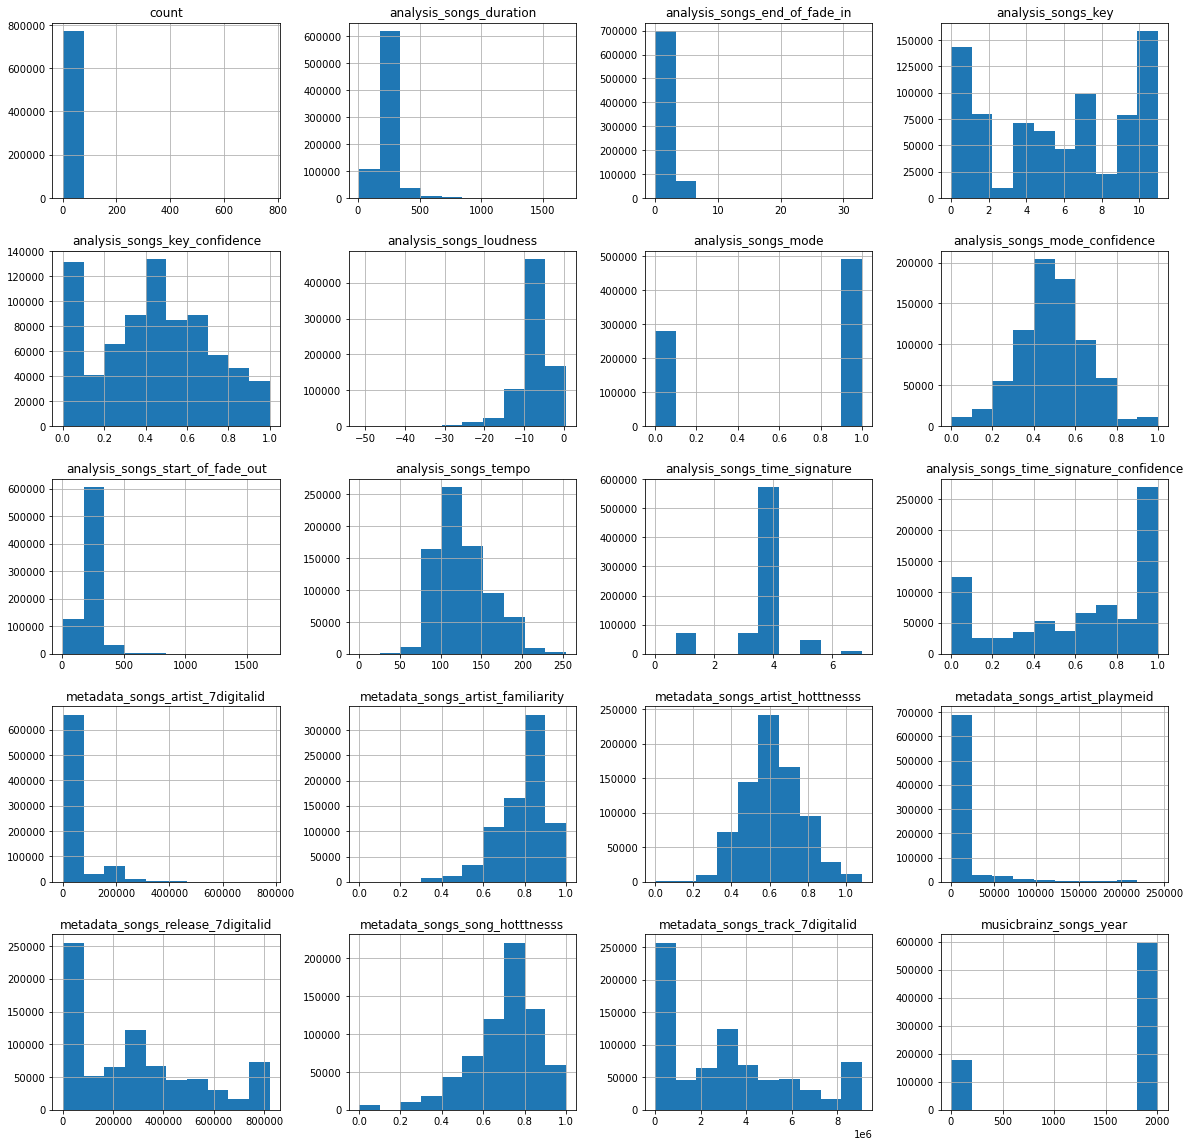

In [54]:
cleaned_df.hist(figsize=(20, 20));

Many columns from the above numeric data seem to have observations that are near or close to 0. It appears that these might represent missing data for the numeric features.

In [55]:
#Analyze how many 0's there are in each column. Note: NaN's are not considered zeroes
df_num = cleaned_df.select_dtypes(include='number')
(len(df.index)) - df_num.astype(bool).sum(axis=0)

count                                            0
analysis_songs_duration                          0
analysis_songs_end_of_fade_in               228101
analysis_songs_key                           71215
analysis_songs_key_confidence                32718
analysis_songs_loudness                          0
analysis_songs_mode                         280472
analysis_songs_mode_confidence                6812
analysis_songs_start_of_fade_out                 0
analysis_songs_tempo                           475
analysis_songs_time_signature                   20
analysis_songs_time_signature_confidence    108340
metadata_songs_artist_7digitalid                 0
metadata_songs_artist_familiarity               75
metadata_songs_artist_hotttnesss               605
metadata_songs_artist_playmeid                   0
metadata_songs_release_7digitalid                0
metadata_songs_song_hotttnesss                6876
metadata_songs_track_7digitalid                  0
musicbrainz_songs_year         

In [56]:
# Analyze how many 0's there are in the msd dataset. The above may have many songs repeated as multiple users
# may have listened to the same song. No need to assess the observations with 10,000 0 values as these have already
# been removed from the main dataset
msd_num_df = df_msd.select_dtypes(include='number')
10000 - msd_num_df.astype(bool).sum(axis=0)

analysis_songs_analysis_sample_rate                  0
analysis_songs_danceability                      10000
analysis_songs_duration                              0
analysis_songs_end_of_fade_in                     3080
analysis_songs_energy                            10000
analysis_songs_idx_bars_confidence               10000
analysis_songs_idx_bars_start                    10000
analysis_songs_idx_beats_confidence              10000
analysis_songs_idx_beats_start                   10000
analysis_songs_idx_sections_confidence           10000
analysis_songs_idx_sections_start                10000
analysis_songs_idx_segments_confidence           10000
analysis_songs_idx_segments_loudness_max         10000
analysis_songs_idx_segments_loudness_max_time    10000
analysis_songs_idx_segments_loudness_start       10000
analysis_songs_idx_segments_pitches              10000
analysis_songs_idx_segments_start                10000
analysis_songs_idx_segments_timbre               10000
analysis_s

Features that should definitely have naturally occuring 0's:

* Key: values range from 0 to 11, each corresponding to a musical key
* Mode: values are either 0 or 1, representing major or minor
* Features ending in 'confidence': confidence values range from 0 to 1

Features that may have naturally occuring 0's, or 0's correspond to missing values:

* End of fade-in: 0 indicates there is no fade-in, or fade-in value is missing
* Features ending in 'hotttnesss': unsure but these may have a certain range
* Artist Familiarity: These 0's could potentially indicate unknown artists

Features that 0's most likely correspond to missing values:

* Year: 0's correspond to missing values, we can represent these by binning by decade
* Tempo: songs cannot have 0 tempo (it's represented in BPM), we can use equal width binning
* Time signature: cannot be 0 (represented as beats per bar), 0 in this column represents missing values

Features ending in hottness and artist familiarity are both computed via algorithmic estimation. Two out of the 3 features appear to have a range of 0-1 which indicates that values of 0 are normal for these features. One of the 3 features had a range from 0 - 1.08. As 1.08 is close enough to 1, we felt this was an outlier and that we could normalize this feature to be in a range of 0-1 using min-max normalization.

In [57]:
#Identify how many values in metadata_songs_artist_hotttnesss are above 1
msd_num_df[msd_num_df > 1.0 ].count()

analysis_songs_analysis_sample_rate              10000
analysis_songs_danceability                          0
analysis_songs_duration                          10000
analysis_songs_end_of_fade_in                     1568
analysis_songs_energy                                0
analysis_songs_idx_bars_confidence                   0
analysis_songs_idx_bars_start                        0
analysis_songs_idx_beats_confidence                  0
analysis_songs_idx_beats_start                       0
analysis_songs_idx_sections_confidence               0
analysis_songs_idx_sections_start                    0
analysis_songs_idx_segments_confidence               0
analysis_songs_idx_segments_loudness_max             0
analysis_songs_idx_segments_loudness_max_time        0
analysis_songs_idx_segments_loudness_start           0
analysis_songs_idx_segments_pitches                  0
analysis_songs_idx_segments_start                    0
analysis_songs_idx_segments_timbre                   0
analysis_s

There are a total of 15 song artist_hotttness values above 1

In [58]:
## Apply min-max scaling to song artist hotness to normalize the data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_df[['metadata_songs_artist_hotttnesss']] = scaler.fit_transform(cleaned_df[['metadata_songs_artist_hotttnesss']])
num_cleaned_df = cleaned_df.select_dtypes(include = 'number')
num_cleaned_df[num_cleaned_df > 1.0 ].count()

count                                       304732
analysis_songs_duration                     772661
analysis_songs_end_of_fade_in               167481
analysis_songs_key                          629048
analysis_songs_key_confidence                    0
analysis_songs_loudness                          0
analysis_songs_mode                              0
analysis_songs_mode_confidence                   0
analysis_songs_start_of_fade_out            772661
analysis_songs_tempo                        772186
analysis_songs_time_signature               700509
analysis_songs_time_signature_confidence         0
metadata_songs_artist_7digitalid            772636
metadata_songs_artist_familiarity                0
metadata_songs_artist_hotttnesss                 0
metadata_songs_artist_playmeid              490097
metadata_songs_release_7digitalid           772661
metadata_songs_song_hotttnesss                   0
metadata_songs_track_7digitalid             772661
musicbrainz_songs_year         

In [59]:
## Impute for missing values of song hottness. Mean of song hotness is 0.7, while median is 0.73. They are 
## fairly close, but the distribution seems to exhibit a slight skew, therefore, median imputation is used.
## First, we add an extra column to track rows with missing values for song hottness to know what was imputed
cleaned_df['song_hotttnesss_indicator_missing'] = np.where(cleaned_df['metadata_songs_song_hotttnesss'].isna(), True, False)
cleaned_df[53890:]

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_year,song_hotttnesss_indicator_missing
53890,5a905f000fc1ff3df7ca807d57edb608863db05d,SOEBCBI12AF72A154F,5,"[0.307, 0.28, 0.104, 0.082, 0.083, 0.044, 0.11...","[1.57393, 3.88507, 6.20761, 8.47594, 10.73284,...","[0.809, 0.414, 0.654, 0.458, 0.472, 0.0, 0.0, ...","[0.42479, 1.00115, 1.57393, 2.14601, 2.7188, 3...","[1.0, 0.754, 0.757, 0.662, 0.644, 0.685, 0.646...","[0.0, 14.09102, 69.62074, 105.58864, 128.44989...","[0.0, 0.498, 0.474, 0.461, 0.195, 0.329, 0.226...","[-60.0, -45.875, -37.148, -30.076, -26.199, -2...","[0.0, 0.36721, 0.22092, 0.22957, 0.15626, 0.22...","[-60.0, -60.0, -45.886, -37.325, -30.198, -26....","[[0.809, 0.906, 1.0, 0.892, 0.663, 0.469, 0.37...","[0.0, 0.4629, 0.83837, 1.0766, 1.31497, 1.4826...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",1ee9c51dd22de7dd8e48fa8a77561899,368.79628,0.463,4,0.183,-11.194,0,0.245,358.185,105.020,4,0.580,TRALZBV128F4250E60,"[0.137, 0.134, 0.131, 0.128, 0.125, 0.122, 0.1...","[0.13875, 0.28213, 0.42479, 0.56959, 0.71511, ...","[b'electronic', b'pop', b'indie rock', b'alter...","[1.0, 0.8789930581462897, 0.834325976888652, 0...","[1.0, 0.9011018715372711, 0.8988354564367593, ...","[b'AR1KT1P1187B9ACB79', b'AROYN4M1187B99C3EB',...",,7488,0.769099,0.450667,AR7DBMA1187FB516B1,Sweden,cf16d0a3-9d9c-44d4-b610-f0baccc27912,The Knife,99117,,Silent Shout,275321,NaN,SOEBCBI12AF72A154F,The Captain,3061679,[],[],0,True
53891,5696bf760215a24ba6f381b8e466828131ddf13b,SOEBCBI12AF72A154F,1,"[0.307, 0.28, 0.104, 0.082, 0.083, 0.044, 0.11...","[1.57393, 3.88507, 6.20761, 8.47594, 10.73284,...","[0.809, 0.414, 0.654, 0.458, 0.472, 0.0, 0.0, ...","[0.42479, 1.00115, 1.57393, 2.14601, 2.7188, 3...","[1.0, 0.754, 0.757, 0.662, 0.644, 0.685, 0.646...","[0.0, 14.09102, 69.62074, 105.58864, 128.44989...","[0.0, 0.498, 0.474, 0.461, 0.195, 0.329, 0.226...","[-60.0, -45.875, -37.148, -30.076, -26.199, -2...","[0.0, 0.36721, 0.22092, 0.22957, 0.15626, 0.22...","[-60.0, -60.0, -45.886, -37.325, -30.198, -26....","[[0.809, 0.906, 1.0, 0.892, 0.663, 0.469, 0.37...","[0.0, 0.4629, 0.83837, 1.0766, 1.31497, 1.4826...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",1ee9c51dd22de7dd8e48fa8a77561899,368.79628,0.463,4,0.183,-11.194,0,0.245,358.185,105.020,4,0.580,TRALZBV128F4250E60,"[0.137, 0.134, 0.131, 0.128, 0.125, 0.122, 0.1...","[0.13875, 0.28213, 0.42479, 0.56959, 0.71511, ...","[b'electronic', b'pop', b'indie rock', b'alter...","[1.0, 0.8789930581462897, 0.834325976888652, 0...","[1.0, 0.9011018715372711, 0.8988354564367593, ...","[b'AR1KT1P1187B9ACB79', b'AROYN4M1187B99C3EB',...",,7488,0.769099,0.450667,AR7DBMA11

In [60]:
## Perform median imputation on song hotness
cleaned_df['metadata_songs_song_hotttnesss'] = cleaned_df['metadata_songs_song_hotttnesss'].fillna(cleaned_df['metadata_songs_song_hotttnesss'].median())
print(cleaned_df['metadata_songs_song_hotttnesss'].isnull().sum())

0


In [61]:
## Bin year by decade. Note: 0 values are converted to NaN to ensure proper binning
cleaned_df['musicbrainz_songs_year'].replace(0, np.nan, inplace = True)
print(cleaned_df['musicbrainz_songs_year'].isnull().sum())

176352


In [62]:
## Bin year by decade
cleaned_df['years_binned'] = pd.cut(cleaned_df.musicbrainz_songs_year, bins=[1970, 1980, 1990, 2000, 2010, 2020], include_lowest=True)
cleaned_df.head()

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_year,song_hotttnesss_indicator_missing,years_binned
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.21,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",1987.0,False,"(1980.0, 1990.0]"
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.21,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0.

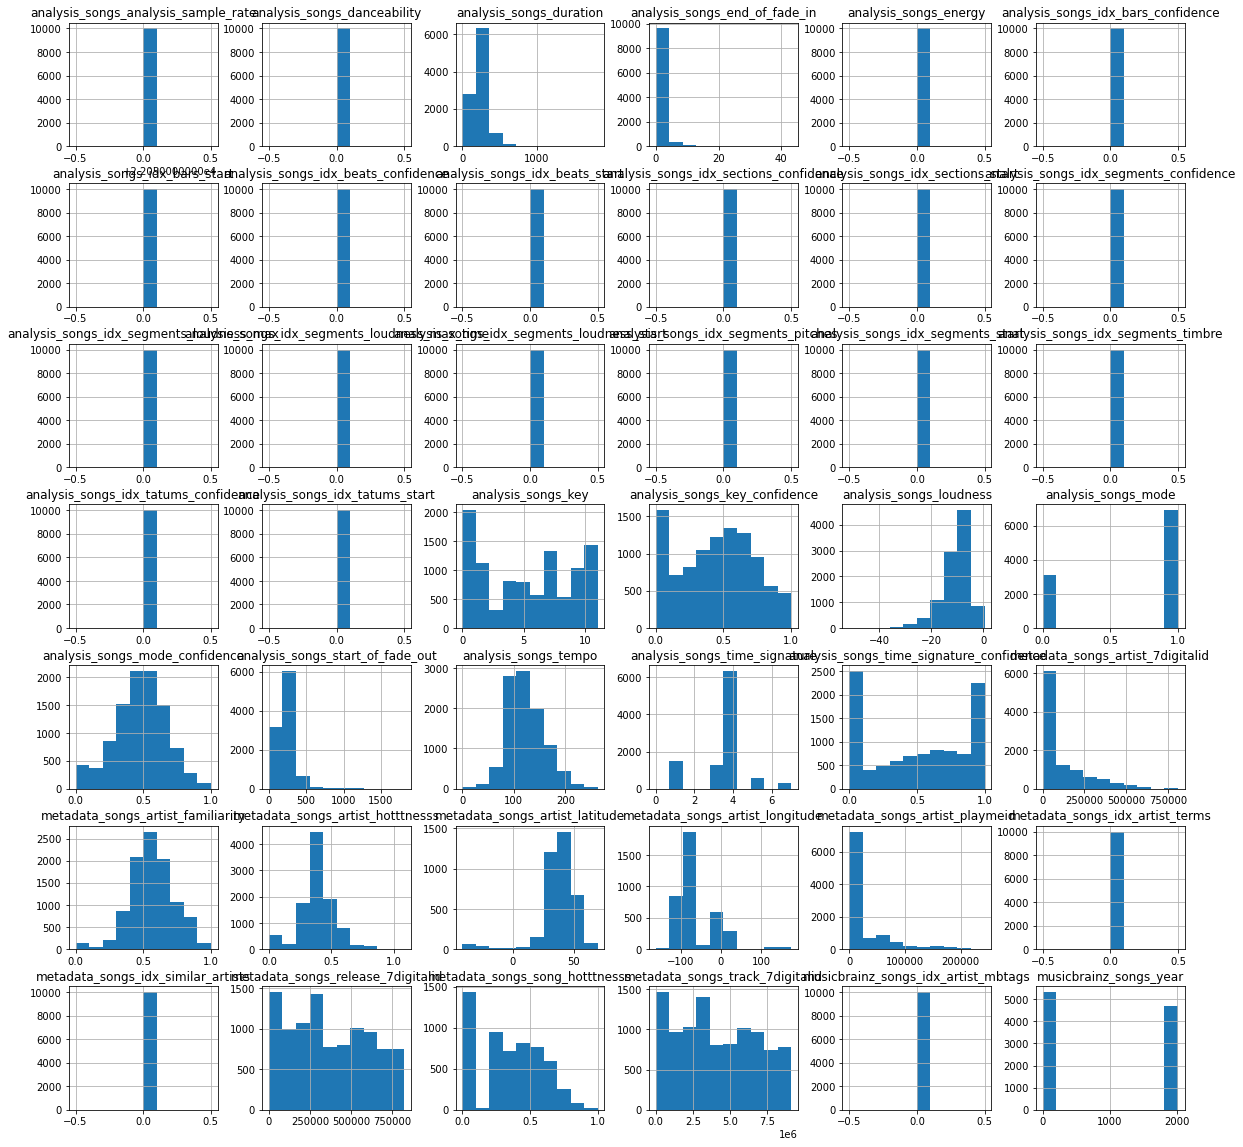

In [63]:
## Check distribution of tempo in msd dataset
df_msd.hist(figsize=(20, 20));

In [64]:
## Perform equal width binning on tempo. As distribution in songs dataset differs from main dataset, leverage
## binning on songs dataset to define bins for main dataset. First, 0 values should be replaced with Nan to 
## ensure proper binning
df_msd['analysis_songs_tempo'].replace(0, np.nan, inplace = True)

In [65]:
# Perform equal width binning based on decile
df_msd['tempo_binned'] = pd.qcut(df_msd.analysis_songs_tempo, q=10)
df_msd.head()

,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_analysis_sample_rate,analysis_songs_audio_md5,analysis_songs_danceability,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_energy,analysis_songs_idx_bars_confidence,analysis_songs_idx_bars_start,analysis_songs_idx_beats_confidence,analysis_songs_idx_beats_start,analysis_songs_idx_sections_confidence,analysis_songs_idx_sections_start,analysis_songs_idx_segments_confidence,analysis_songs_idx_segments_loudness_max,analysis_songs_idx_segments_loudness_max_time,analysis_songs_idx_segments_loudness_start,analysis_songs_idx_segments_pitches,analysis_songs_idx_segments_start,analysis_songs_idx_segments_timbre,analysis_songs_idx_tatums_confidence,analysis_songs_idx_tatums_start,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_latitude,metadata_songs_artist_location,metadata_songs_artist_longitude,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_idx_artist_terms,metadata_songs_idx_similar_artists,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_idx_artist_mbtags,musicbrainz_songs_year,tempo_binned
0,"[0.179, 0.373, 0.127, 0.015, 0.012, 0.119, 0.0...","[0.52458, 2.4444, 4.3658, 6.30006, 8.22086, 10...","[0.886, 0.725, 0.748, 0.721, 0.784, 0.417, 0.4...","[0.04257, 0.52458, 1.00659, 1.48632, 1.96605, ...","[1.0, 1.0, 0.508, 0.334, 0.113, 0.593]","[0.0, 7.74174, 40.30707, 80.4797, 89.656, 127....","[0.0, 0.732, 1.0, 0.556, 1.0, 0.584, 0.559, 1....","[-60.0, -52.849, -42.59, -41.542, -32.881, -34...","[0.0, 0.19543, 0.02958, 0.0238, 0.02788, 0.020...","[-60.0, -60.0, -55.39, -46.295, -48.97, -39.43...","[[0.726, 0.112, 0.02, 0.019, 0.01, 0.038, 0.03...","[0.0, 0.19188, 0.60499, 0.84939, 1.10018, 1.36...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",22050,d8bafd4a65d1855aec08991c8b013dc1,0.0,148.74077,0.192,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.591,-9.636,1,0.556,141.607,124.059,4,0.372,TRARRZU128F4253CA2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04257, 0.28357, 0.52458, 0.76558, 1.00659, ...","[b'chanson', b'visual kei', b'hip hop', b'pop ...","[0.9106976156829982, 0.892165696549715, 1.0, 0...","[1.0, 0.9915376816967095, 0.9554596873428609, ...","[b'ARVEJ9M1187FB4DC44', b'ARYDHN21187FB466A8',...",,16971,0.557460,0.386152,AREJXK41187B9A4ACC,46.71067,France,1.71819,c43bb0d6-94d7-410f-80fb-e5a243b18d23,Raphaël,2676,,0,0,Je Sais Que La Terre Est Plate (Deluxe),275907,0.547953,SOGSMXL12A81C23D88,Je Sais Que La Terre Est Plate,3073568,[],[],0,2008,"(120.211, 128.166]"
1,"[0.716, 0.306, 0.015, 0.572, 0.529, 0.353, 0.2...","[8.69527, 12.01758, 14.81363, 20.09003, 22.693...","[0.773, 0.247, 0.402, 0.115, 0.092, 0.436, 0.5...","[0.59161, 1.33555, 2.07949, 2.82093, 3.56238, ...","[1.0, 0.502, 0.721, 0.552, 0.575, 0.704, 0.332...","[0.0, 7.08047, 39.03442, 89.26989, 114.94898, ...","[0.0, 1.0, 0.276, 0.54, 0.009, 0.53, 0.624, 0....","[-59.854, -31.966,

In [66]:
## merge bins to main dataset
df_to_merge = df_msd[['analysis_songs_tempo', 'tempo_binned']]
cleaned_df.merge(df_to_merge, on='analysis_songs_tempo')

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_duration,analysis_songs_end_of_fade_in,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_start_of_fade_out,analysis_songs_tempo,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,musicbrainz_songs_year,song_hotttnesss_indicator_missing,years_binned,tempo_binned
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.210,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",1987.0,False,"(1980.0, 1990.0]","(151.381, 169.948]"
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,3.210,5,0.351,-8.403,0,0.318,188.285,165.006,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.944

In [67]:
## Set option to display all columns in dataframe
pd.set_option('display.max_columns', None)
# Drop year and tempo columns from main dataset as we will use the binned values going forward. Additionally,
# drop fade in and fade out columns as we believe it is extraneous and not relevant for reccomendation
cleaned_df.drop(['analysis_songs_tempo', 'musicbrainz_songs_year', 'analysis_songs_end_of_fade_in', 'analysis_songs_start_of_fade_out'], axis=1, inplace=True)
cleaned_df.head()

,user,song,count,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,song_hotttnesss_indicator_missing,years_binned
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,5,0.351,-8.403,0,0.318,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,194.87302,5,0.351,-8.403,0,0.318,1,0.034,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1....","[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gip

### 'Object' Data Exploration

We have two types of 'object' types: those storing strings and those storing arrays. These arrays could store numbers or strings.

In [68]:
df_obj = cleaned_df.select_dtypes(include='object')
df_obj_anal = df_obj[[col for col in df_obj if col.startswith('analysis')]]
df_obj_anal.head()

,analysis_bars_confidence,analysis_bars_start,analysis_beats_confidence,analysis_beats_start,analysis_sections_confidence,analysis_sections_start,analysis_segments_confidence,analysis_segments_loudness_max,analysis_segments_loudness_max_time,analysis_segments_loudness_start,analysis_segments_pitches,analysis_segments_start,analysis_segments_timbre,analysis_songs_audio_md5,analysis_songs_track_id,analysis_tatums_confidence,analysis_tatums_start
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1...."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1...."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1...."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0, 0.63, 0.519, 0.637, 0.806, 0.526, 0.39, ...","[0.0, 27.81345, 38.36246, 48.17733, 79.82575, ...","[0.0, 1.0, 1.0, 1.0, 0.31, 0.298, 0.8, 0.232, ...","[-60.0, -35.155, -14.082, -7.846, -7.929, -7.9...","[0.0, 0.11378, 0.08047, 0.09709, 0.06305, 0.22...","[-60.0, -60.0, -38.394, -30.407, -11.718, -13....","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[0.0, 2.30331, 2.67125, 2.84449, 3.07365, 3.25...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",ad27a50d9b770ac4d027fd8c1f298bd4,TRAUCNU128F42671EB,"[0.097, 0.129, 0.157, 0.18, 0.204, 0.219, 0.24...","[0.18795, 0.3644, 0.5345, 0.71638, 0.90098, 1...."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.71, 0.772, 0.791, ...","[0.18795, 0.5345, 0.90098, 1.26745, 1.6303, 1....","[1.0,

This is all pure audio data. The description on the website confirms this. Given that this data would require significant time to determine how to work with, we have made the decision to exclude it. Additionally, other online implementations of a recommendation system using this data do not make use of these columns. The only thing we need to keep in the above is track_id.

In [69]:
## drop the arrays from the main dataset
df_obj_anal.drop(['analysis_songs_track_id'], axis=1)
obj_to_delete = list(df_obj_anal.columns)
master_data_df = cleaned_df.drop(obj_to_delete, axis=1)
master_data_df.head()

,user,song,count,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_artist_terms,metadata_artist_terms_freq,metadata_artist_terms_weight,metadata_similar_artists,metadata_songs_analyzer_version,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_genre,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,musicbrainz_artist_mbtags_count,song_hotttnesss_indicator_missing,years_binned
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...","[0.9085998342694063, 1.0, 0.974313019239368, 0...","[1.0, 0.9445250391548851, 0.869826570448695, 0...","[b'AR9Z7JB1187B99DB3D', b'ARC1SF21187FB51D0F',...",,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']","[1, 1]",False,"(1980.0, 1990.0]"


The decision was also made to remove other columns containing numeric data in arrays given the complexity required to work with them. The decision was made to remove the following:

* metadata_artist_terms_freq
* metadata_artist_terms_weight
* metadata_similar_artists
* musicbrainz_artist_mbtags_count
* metadata_songs_analyzer_version (values appear to be empty)
* metadata_songs_genre (values appear to be empty)

In [70]:
## Assess whether all values in metadata_songs_analyzer_version are empty
master_data_df.metadata_songs_analyzer_version.unique()

array([''], dtype=object)

In [71]:
## Assess whether all values in metadata_songs_genre are empty
master_data_df.metadata_songs_genre.unique()

array([''], dtype=object)

Since we have confirmed the values are empty, we will remove this column.

In [72]:
## Remove columns with arrays data that were noted above
master_data_df.drop(['metadata_artist_terms_freq', 'metadata_artist_terms_weight', 'metadata_similar_artists', 'musicbrainz_artist_mbtags_count', 'metadata_songs_analyzer_version', 'metadata_songs_genre'], axis=1, inplace=True)
master_data_df.head()

,user,song,count,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_artist_terms,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,musicbrainz_artist_mbtags,song_hotttnesss_indicator_missing,years_binned
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...",30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']",False,"(1980.0, 1990.0]"
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...",30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']",False,"(1980.0, 1990.0]"
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...",30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']",False,"(1980.0, 1990.0]"
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...",30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']",False,"(1980.0, 1990.0]"
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,"[b'flamenco', b'soundtrack', b'folk', b'spanis...",30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,"[b'classic pop and rock', b'folk']",False,"(1980.0, 1990.0]"


In [73]:
## Convert other arrays into strings separated by a pipe
#musicbrainz_artist_mbtags
#metadata_artist_terms
master_data_df['musicbrainz_artist_tags'] = ['|'.join(map(str, l)) for l in df['musicbrainz_artist_mbtags']]
master_data_df.drop(['musicbrainz_artist_mbtags'], axis=1, inplace=True)

In [74]:
master_data_df['metadata_artist_termss'] = ['|'.join(map(str, l)) for l in df['metadata_artist_terms']]
master_data_df.drop(['metadata_artist_terms'], axis=1, inplace=True)
master_data_df.head()

,user,song,count,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_id,metadata_songs_artist_location,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_artist_playmeid,metadata_songs_release,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_song_id,metadata_songs_title,metadata_songs_track_7digitalid,song_hotttnesss_indicator_missing,years_binned,musicbrainz_artist_tags,metadata_artist_termss
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,1,194.87302,5,0.351,-8.403,0,0.318,1,0.034,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,2,194.87302,5,0.351,-8.403,0,0.318,1,0.034,30031,0.710446,0.499427,AR2UQQ51187B9AC816,"Arles, France",44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,5223,Greatest Hits,283353,0.778821,SOWEZSI12A81C21CE6,Tu Quieres Volver,3167278,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...


In [76]:
## Add analysis regarding decision to remove artist location
locations = list(df_obj[df_obj['metadata_songs_artist_location'] != '']['metadata_songs_artist_location'].unique())
print(locations)

['Arles, France', 'ALBUCRAZY, NEW MEXICO', 'St. Joseph, MO', 'Paris, France', 'London, England', 'oxford', 'Washington DC', 'Sweden', 'London', 'Melbourne, Australia', 'Middlesbrough, England', 'Nashville, Tennessee', 'UK', 'Pasadena, CA', 'Barranquilla, Colombia', 'NY - Long Island', 'Los Angeles, CA', 'Marshville, NC', 'Mt. Vernon, NY', 'Seattle, WA', 'Buenos Aires, Argentina', 'Gainesville, FL', 'New York, NY', 'Boston, MA', 'Scotland', 'Queensbridge, NY', 'Jamaica', 'Chiswick, London, England', 'Dundee, Scotland', 'Minneapolis, MN', 'Newark, NJ', 'Kingston, Jamaica', 'California - LA', 'Galveston, TX', 'NY - New York City', 'Atlanta, GA', 'Hanna, Alberta, Canada', 'Geneva, Switzerland', 'Sydney, Australia', 'Braintree, Essex, England', 'Toronto, Ontario, Canada', 'Chicago, IL', 'LDN', 'St Michael, Barbados ', 'Oxford, UK', 'Birmingham, England', 'Los Angeles, Ca', 'Bay Area, CA', 'Nashville / Los Angeles', 'Wyomissing, PA', 'Sheffield, South Yorkshire, Engla', 'Severn, MD', 'New Yo

Artist location format is not consistent. For example, "New York" could also be "NY." Therefore, we will remove this column.

In [77]:
# Remove artist location from data
master_data_df.drop(['metadata_songs_artist_location'], axis=1, inplace=True)

In [78]:
## Create one standardized dataset
numeric_master_df = master_data_df.select_dtypes(include='number')
other_master_df = master_data_df.select_dtypes(exclude = 'number')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = numeric_master_df.columns
scaled_features_df = pd.DataFrame(scaler.fit_transform(numeric_master_df), columns=cols)
standardized_master_data_df = other_master_df.merge(scaled_features_df, how='left', left_index=True, right_index=True)
standardized_master_data_df.head()

,user,song,metadata_songs_artist_id,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_release,metadata_songs_song_id,metadata_songs_title,song_hotttnesss_indicator_missing,years_binned,musicbrainz_artist_tags,metadata_artist_termss,count,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_playmeid,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_track_7digitalid
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.12546,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,False,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.12546,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306


In [79]:
## drop song hottness missing indicator in both datasets
master_data_df.drop(['song_hotttnesss_indicator_missing'], axis=1)
standardized_master_data_df.drop(['song_hotttnesss_indicator_missing'], axis=1)

,user,song,metadata_songs_artist_id,metadata_songs_artist_mbid,metadata_songs_artist_name,metadata_songs_release,metadata_songs_song_id,metadata_songs_title,years_binned,musicbrainz_artist_tags,metadata_artist_termss,count,analysis_songs_duration,analysis_songs_key,analysis_songs_key_confidence,analysis_songs_loudness,analysis_songs_mode,analysis_songs_mode_confidence,analysis_songs_time_signature,analysis_songs_time_signature_confidence,metadata_songs_artist_7digitalid,metadata_songs_artist_familiarity,metadata_songs_artist_hotttnesss,metadata_songs_artist_playmeid,metadata_songs_release_7digitalid,metadata_songs_song_hotttnesss,metadata_songs_track_7digitalid
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
1,833c530ecda3d99deb8395f70400aa3999783d91,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.12546,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
2,d6c5bd2b570b4faf8964d7ed04f3392ff505d2be,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
3,724534729c9f5dc72a009269c2c225883e4775d2,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.30879,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
4,ee7aa84c164038c963cfd02a7e52a5598aa470c3,SOWEZSI12A81C21CE6,AR2UQQ51187B9AC816,44a7f7d5-79df-4f44-8f5e-02dfc0626904,Gipsy Kings,Greatest Hits,SOWEZSI12A81C21CE6,Tu Quieres Volver,"(1980.0, 1990.0]",b'classic pop and rock'|b'folk',b'flamenco'|b'soundtrack'|b'folk'|b'spanish'|b...,-0.12546,-0.547797,-0.186281,-0.302721,-0.271438,-1.324711,-1.035026,-2.673129,-1.639388,-0.096739,-0.682318,-0.495907,-0.177583,-0.005336,0.424777,-0.002306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772656,3a2d1642c26b16b178a43bead38ea1fe6883e543,SOZSHWZ12A8C1452B5,ARKSLFG1187B99DADD,90ad2897-c838-4703-bc96-ac93bdc127bd,The Keys,The Keys,SOZSHWZ12A8C1452B5,From Tense To Loose To Slack,NaN,,b'power pop'|b'jangle pop'|b'garage rock'|b'ne...,-0.30879,-1.192337,0.920031,1.606548,-0.500709,0.754882,1.706283,1.242329,0.808690,3.028053,-2.192938,-1.614583,-0.350083,0.137534,-4.437005,0.153719
772657,a92dcaddbdf2e46c40488823431d980614ab9c66,SOKTKTM12AB0189837,ARQFKVO1187B9B1777,99f0e05e-e63e-4b48-a0a7-039ad3f9fc3d,Dave Brockie Experience,Songs For The Wrong,SOKTKTM12AB0189837,Slips Of Paper,"(2000.0, 2010.0]",,b'shock rock'|b'hard rock'|b'punk'|b'united st...,-0.30879,-1.398525,-1.292594,0.214296,0.282064,0.754882,-0.799539,-2.673129,-1.733438,5.470340,-2.579665,-1.844510,-0.350083,1.103632,-2.419981,1.093373
772658,6b9df737dae978d4b8a2099ffa6a501a3c30b091,SOMLFVN12A8C136135,ARTK5LU1187B9A654C,d83529bf-6d3a-4c85-9c5f-e7c991c19956,Michael Gettel,San Juan Suite/San Juan Suite II: Narada Classics,SOMLFVN12A8C

In [80]:
## Export cleaned datasets to csv
master_data_df.to_pickle(reldir + 'master_data_df.csv', compression='zip')
standardized_master_data_df.to_pickle(reldir + 'standardized_master_data_df.csv', compression='zip')